
 Se ajusta un Multilayer Perceptron para clasificar opiniones sobre películas. Para esto:  
 1. Se Almacena la base de datos en un DataFrame de Pandas y se cuenta el número de observaciones, el número de clases y el número de datos por clase. Además, se preprocesan los datos(limpieza y tokenización) y se realiza una vectorización TF-IDF.
 2. Se Dividen los datos en un conjunto de entrenamiento y un conjunto de validación para posteriormente ajustar un Multilayer Perceptron para clasificar datos, a partir de los vectores TF-IDF generados anteriormente. Se muestran las curvas de rendimiento(o curvas de aprendizaje) sobre el valor de la función de pérdida y la exactitud en función de las épocas de entrenamiento.

In [1]:
import pandas as pd
df = pd.read_csv('movie_reviews.csv')
df

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
...,...,...
49995,"OK, lets start with the best. the building. al...",0
49996,The British 'heritage film' industry is out of...,0
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0


In [2]:
import numpy as np
print('Number of observations: '+str(len(df)))
print('Number of class: '+str(len(np.unique(df.sentiment))))
print('Number of class = 1: '+str(sum(df.sentiment)))
print('Number of class = 0: '+str(len(df)-sum(df.sentiment)))

Number of observations: 50000
Number of class: 2
Number of class = 1: 25000
Number of class = 0: 25000


In [3]:
corpus = [df['review'][i].lower() for i in range(0,len(df))]

In [4]:
import re
import nltk
Corpus=[]
stopwords = nltk.corpus.stopwords.words('english')
for doc in corpus:
    out = re.sub(r'[^\w\s]','',doc)
    Corpus.append(out)

In [5]:
df.review[0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [6]:
Corpus[0]

'in 1974 the teenager martha moxley maggie grace moves to the highclass area of belle haven greenwich connecticut on the mischief night eve of halloween she was murdered in the backyard of her house and her murder remained unsolved twentytwo years later the writer mark fuhrman christopher meloni who is a former la detective that has fallen in disgrace for perjury in oj simpson trial and moved to idaho decides to investigate the case with his partner stephen weeks andrew mitchell with the purpose of writing a book the locals squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that was in charge of the investigation in the 70s they discover the criminal and a net of power and money to cover the murderbr br murder in greenwich is a good tv movie with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy the powerful and rich family used their influence to cover the mu

In [7]:
df=pd.DataFrame(list(zip(Corpus,df.sentiment)), columns = ['review','sentiment'])
df

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about wa...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0
...,...,...
49995,ok lets start with the best the building altho...,0
49996,the british heritage film industry is out of c...,0
49997,i dont even know where to begin on this one it...,0
49998,richard tyler is a little boy who is scared of...,0


In [8]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df, df['sentiment'], test_size= 0.4, random_state= 104, stratify= df['sentiment'])
index_train = x_train.index.values
index_train.sort()
index_test = x_test.index.values
index_test.sort()

In [9]:
len(index_train),len(index_test)

(30000, 20000)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf_model = TfidfVectorizer(min_df = 0.01,max_df = 0.99,encoding='utf-8',stop_words=stopwords,tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=Corpus).toarray()
tfidf_docs

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10307978, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08392449, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [11]:
tfidf_docs.shape

(50000, 1617)

In [12]:
x_train, x_test, y_train, y_test = tfidf_docs[index_train] ,tfidf_docs[index_test], df.sentiment[index_train], df.sentiment[index_test]

In [13]:
np.max(tfidf_docs)

0.9383617383728959

In [14]:
import sklearn
scaler=sklearn.preprocessing.MinMaxScaler()
scalate = scaler.fit_transform(tfidf_docs)

In [15]:
np.min(scalate),np.max(scalate)

(0.0, 1.0)

In [16]:
x_train, x_test = scalate[index_train] ,scalate[index_test]

In [17]:
print('reviews positivas en entrenamiento:',y_train.sum())
print('reviews positivas en testeo:',y_test.sum())

print('total de reviews positivas: '+str(y_train.sum() + y_test.sum()))

reviews positivas en entrenamiento: 15000
reviews positivas en testeo: 10000
total de reviews positivas: 25000


In [18]:
num_labels = len(np.unique(y_train))
num_labels

2

In [19]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train).astype('int32')
y_test = to_categorical(y_test).astype('int32')

In [20]:
y_train

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]])

In [21]:
'''Hiperparámetros de la red:'''
batch_size = 256 
hidden_units = 16
dropout = 0.5
epochs = 10

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(hidden_units, input_dim = x_train.shape[1])) 
model.add(Activation('relu')) 
model.add(Dropout(dropout)) 
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                25888     
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 25,922
Trainable params: 25,922
Non-trainable params: 0
_________________________________________________________________


In [23]:
from keras import optimizers

'''Configuración'''
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
'''Entrenamiento del modelo'''
history = model.fit(scalate[index_train], y_train, batch_size= batch_size, epochs= epochs, validation_data = (scalate[index_test], y_test))

'''Evaluación en el conjunto de testeo'''
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/10
118/118 [==============================] - 1s 5ms/step - loss: 0.6161 - accuracy: 0.7216 - val_loss: 0.5022 - val_accuracy: 0.8427
Epoch 2/10
118/118 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.8312 - val_loss: 0.3815 - val_accuracy: 0.8627
Epoch 3/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.8558 - val_loss: 0.3355 - val_accuracy: 0.8663
Epoch 4/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8663 - val_loss: 0.3166 - val_accuracy: 0.8700
Epoch 5/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3233 - accuracy: 0.8747 - val_loss: 0.3072 - val_accuracy: 0.8720
Epoch 6/10
118/118 [==============================] - 0s 3ms/step - loss: 0.3091 - accuracy: 0.8780 - val_loss: 0.3028 - val_accuracy: 0.8721
Epoch 7/10
118/118 [==============================] - 0s 3ms/step - loss: 0.2995 - accuracy: 0.8824 - val_loss: 0.3007 - val_accuracy: 0.8729
Epoch 

In [25]:
predictions = model.predict(x_test)
predictions

array([[9.9999583e-01, 4.1291050e-06],
       [9.9905223e-01, 9.4772695e-04],
       [1.5683496e-02, 9.8431647e-01],
       ...,
       [9.6763426e-01, 3.2365788e-02],
       [9.9972123e-01, 2.7870986e-04],
       [3.6082855e-01, 6.3917142e-01]], dtype=float32)

In [26]:
y_pred = (predictions > 0.5).astype("int32")
y_pred = np.argmax(y_pred, axis= 1)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
y_test = np.argmax(y_test, axis= 1)
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
print('Cantidad de etiquetas mal predichas: '+str((y_test-y_pred).sum()))

Cantidad de etiquetas mal predichas: -276


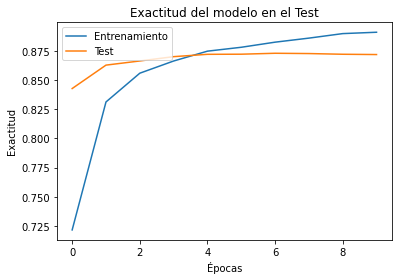

In [29]:
import matplotlib.pyplot as plt

'''Graficamos el desempeño en el conjunto de entrenamiento y testeo:'''
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo en el Test')
plt.ylabel('Exactitud')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
#plt.savefig("Exactitud.jpg", bbox_inches='tight', dpi=300)
plt.show()

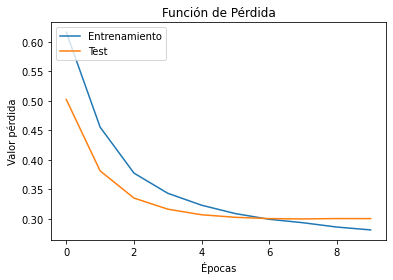

In [30]:
'''Graficamos el comportamiento de la función de pérdida:'''
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de Pérdida')
plt.ylabel('Valor pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
#plt.savefig("pérdida.jpg", bbox_inches='tight', dpi=300)
plt.show()

In [31]:
sklearn.metrics.confusion_matrix(y_test,y_pred)

array([[8580, 1420],
       [1144, 8856]], dtype=int64)

Ahora, se detectan los tópicos latentes incluídos en los comentarios calsificados como positivos por el modelo obtenido. Para esto:  
1. Se considera sólo el conjunto de testeo generado y se clasifica ese grupo de datos con el modelo obtenido. Luego, se toman todos los datos que fueron clasificados como positivos.
2. Sobre las reviews que fueron clasificadas como positivas, se aplica el algoritmo LDiA de sklearn con n_components=8 y se toman los 5 tokens con mayores pesos asignados en cada componente. A partir de estos tokens, se deducen los tópicos latentes incluídos en esos comentarios.

In [32]:
y_pred.T

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [33]:
x_test.shape

(20000, 1617)

In [34]:
tokens = tfidf_model.get_feature_names()

In [35]:
bow_docs = pd.DataFrame(x_test)
bow_docs.columns = tokens
bow_docs

,1,10,100,12,15,2,20,3,30,4,...,yet,york,youd,youll,young,younger,youre,youve,zero,zombie
0,0.170422,0.000000,0.0,0.0,0.0,0.205818,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.164071,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.157180,0.0,0.0,0.0,0.000000,0.0,0.158360,0.000000,0.0,...,0.000000,0.171429,0.0,0.000000,0.136184,0.0,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.305663,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.190498,0.202331,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.239148,0.000000,0.0,0.0,0.0,0.000000,0.0,0.242811,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.140312,0.0,0.0,0.0,0.000000,0.0,0.141365,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.153152,0.0,0.0
19996,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.308205,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.179182,0.172935,0.0,0.0
19997,0.190363,0.000000,0.0,0.0,0.0,0.229900,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
19998,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [36]:
'''Verificando'''
i=11

print(df.loc[index_test[i]].review, df.loc[index_test[i]].sentiment)
print('tokens in document: ')
print(bow_docs.loc[i][bow_docs.loc[i] > 0].head(20))

i was cast as the surfer dude in the beach scenes almost got cast as the muscle guy since the real muscle guy was really really late that day pauly had my brother and i the skateboarder in front of the tattoo place do some vj stuff in between takes live from venice since he was still doing his mtv thing this movie is really good as well would it have made my top 100 if i wasnt in it 1
tokens in document: 
100        0.378652
almost     0.265212
brother    0.295264
cast       0.720433
day        0.292758
front      0.360967
good       0.145883
got        0.259526
guy        0.442080
late       0.390449
live       0.435891
made       0.259289
movie      0.136129
place      0.399790
real       0.188324
really     0.542527
scenes     0.277653
since      0.861838
still      0.260768
stuff      0.406250
Name: 11, dtype: float64


In [37]:
bow_docs['sentiment']=y_pred

In [38]:
bow_docs

,1,10,100,12,15,2,20,3,30,4,...,york,youd,youll,young,younger,youre,youve,zero,zombie,sentiment
0,0.170422,0.000000,0.0,0.0,0.0,0.205818,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.164071,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
1,0.000000,0.157180,0.0,0.0,0.0,0.000000,0.0,0.158360,0.000000,0.0,...,0.171429,0.0,0.000000,0.136184,0.0,0.000000,0.000000,0.0,0.0,0
2,0.000000,0.000000,0.0,0.0,0.0,0.305663,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1
3,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.202331,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1
4,0.239148,0.000000,0.0,0.0,0.0,0.000000,0.0,0.242811,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.000000,0.140312,0.0,0.0,0.0,0.000000,0.0,0.141365,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.153152,0.0,0.0,0
19996,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.308205,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.179182,0.172935,0.0,0.0,0
19997,0.190363,0.000000,0.0,0.0,0.0,0.229900,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0
19998,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0


In [39]:
bow_docs['sentiment'] = bow_docs['sentiment'].astype('category')

In [40]:
bow_docs_postive = bow_docs[bow_docs.sentiment == 1][tokens]
bow_docs_postive

,1,10,100,12,15,2,20,3,30,4,...,yet,york,youd,youll,young,younger,youre,youve,zero,zombie
2,0.000000,0.0,0.0,0.0,0.0,0.305663,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.190498,0.202331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.239148,0.0,0.0,0.0,0.0,0.000000,0.0,0.242811,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.171960,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.495565,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19990,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.332936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19992,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19993,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
sklearn.metrics.confusion_matrix(y_test,y_pred)[0,1]+sklearn.metrics.confusion_matrix(y_test,y_pred)[1,1]

10276

In [42]:
from sklearn.decomposition import LatentDirichletAllocation as LDiA

ldia = LDiA(n_components = 8, learning_method='batch')
ldia = ldia.fit(bow_docs_postive)
ldia.components_.shape

(8, 1617)

In [43]:
columns = ['topic{}'.format(i) for i in range(1,9)]
components = pd.DataFrame(ldia.components_.T, index=tokens, columns=columns)
components.round(2)

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
1,7.63,29.95,1.34,0.13,1.44,0.96,6.30,1.13
10,26.14,93.07,5.96,2.18,3.14,2.10,6.27,16.45
100,6.82,13.31,6.61,0.13,0.18,0.13,2.13,5.05
12,9.73,18.83,4.44,0.13,0.13,0.13,5.54,1.70
15,9.50,19.35,1.65,0.13,0.13,0.13,6.45,3.86
...,...,...,...,...,...,...,...,...
younger,13.05,21.88,7.71,0.13,1.39,0.13,4.76,12.09
youre,33.64,62.93,3.04,0.97,3.71,0.13,11.26,5.18
youve,15.73,27.38,0.92,0.13,0.87,0.13,5.59,2.29
zero,3.00,1.84,0.13,0.13,0.13,0.13,3.19,1.11


In [48]:
for i in range(1,9):
    topic = 'topic'+str(i)
    print('')
    print(topic)
    print(components[topic].sort_values(ascending=False).index[2:7])


topic1
Index(['one', 'also', 'films', 'well', 'movie'], dtype='object')

topic2
Index(['see', 'film', 'one', 'like', 'really'], dtype='object')

topic3
Index(['finds', 'man', 'gets', 'one', 'get'], dtype='object')

topic4
Index(['great', 'best', 'film', 'well', 'excellent'], dtype='object')

topic5
Index(['film', 'great', 'show', 'hilarious', 'funny'], dtype='object')

topic6
Index(['design', 'film', 'cartoon', 'animated', 'movie'], dtype='object')

topic7
Index(['people', 'br', 'life', 'one', 'see'], dtype='object')

topic8
Index(['story', 'movie', 'one', 'films', 'well'], dtype='object')
